In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
%autosave 30

Autosaving every 30 seconds


In [3]:
df_apple = pd.read_json('https://api.iextrading.com/1.0/stock/aapl/chart/2y')

In [4]:
df_google = pd.read_json('https://api.iextrading.com/1.0/stock/googl/chart/2y')

In [5]:
df_fb = pd.read_json('https://api.iextrading.com/1.0/stock/fb/chart/2y')

In [6]:
df_netflix = pd.read_json('https://api.iextrading.com/1.0/stock/nflx/chart/2y')

In [7]:
df_amazon = pd.read_json('https://api.iextrading.com/1.0/stock/amzn/chart/2y')

In [8]:
df_apple.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,0.782614,0.000000,0.852,92.6672,2016-06-21,93.0924,"Jun 21, 16",91.4750,91.7300,35546358,35546358,92.7040
1,-0.347828,-0.003753,-0.375,92.3194,2016-06-22,93.6141,"Jun 22, 16",92.1262,92.9957,29219122,29219122,92.7894
2,0.531403,0.001981,0.576,92.8508,2016-06-23,93.0344,"Jun 23, 16",92.0296,92.6962,32240187,32240187,92.4952
3,-2.608700,-0.026170,-2.810,90.2421,2016-06-24,91.4547,"Jun 24, 16",89.5175,89.7687,75311356,75311356,90.4238
4,-1.314000,-0.040350,-1.456,88.9281,2016-06-27,89.9039,"Jun 27, 16",88.4063,89.8556,46622188,46622188,88.8736


Getting stock data of period 01/01/2017 - 31/12/2017

In [9]:
apple2017 = df_apple[(df_apple['date'] > '2017-01-01') & (df_apple['date'] < '2018-01-01')]

In [10]:
google2017 = df_google[(df_google['date'] > '2017-01-01') & (df_google['date'] < '2018-01-01')]

In [11]:
fb2017 = df_fb[(df_fb['date'] > '2017-01-01') & (df_fb['date'] < '2018-01-01')]

In [12]:
netflix2017 = df_netflix[(df_netflix['date'] > '2017-01-01') & (df_netflix['date'] < '2018-01-01')]

In [13]:
amazon2017 = df_amazon[(df_amazon['date'] > '2017-01-01') & (df_amazon['date'] < '2018-01-01')]

Get only few columns.

In [14]:
df_apple17 = apple2017[['date','open','high','low','close','volume']]

In [15]:
df_apple17.head()

,date,open,high,low,close,volume
135,2017-01-03,113.0684,113.5859,112.0529,113.4101,28781865
136,2017-01-04,113.1172,113.7617,113.0196,113.2832,21118116
137,2017-01-05,113.1856,114.1075,113.0782,113.8593,22193587
138,2017-01-06,114.0253,115.3727,113.7226,115.1286,31751900
139,2017-01-09,115.1677,116.6128,115.1579,116.1832,33561948


In [16]:
# setting date as index
df_apple17.index = df_apple17.pop('date')

In [17]:
df_goole17 = google2017[['date','open','high','low','close','volume']]

# setting date as index
df_goole17.index = df_goole17.pop('date')

In [18]:
df_fb2017 = fb2017[['date','open','high','low','close','volume']]

# setting date as index
df_fb2017.index = df_fb2017.pop('date')

In [19]:
df_netflix2017 = netflix2017[['date','open','high','low','close','volume']]

In [20]:
# setting date as index
df_netflix2017.index = df_netflix2017.pop('date')

In [21]:
df_amazon2017 = amazon2017[['date','open','high','low','close','volume']]

# setting date as index
df_amazon2017.index = df_amazon2017.pop('date')

## Closing Price Analysis

In [22]:
all_stocks_close = pd.DataFrame({"AAPL": df_apple17["close"],
                      "GOOGL": df_goole17["close"],
                      "FB": df_fb2017["close"],
                      "NFLX": df_netflix2017["close"],
                      "AMZN": df_amazon2017["close"]})

In [23]:
# five rows
all_stocks_close.head()

,AAPL,AMZN,FB,GOOGL,NFLX
date,,,,,
2017-01-03,113.4101,753.67,116.86,808.01,127.49
2017-01-04,113.2832,757.18,118.69,807.77,129.41
2017-01-05,113.8593,780.45,120.67,813.02,131.81
2017-01-06,115.1286,795.99,123.41,825.21,131.07
2017-01-09,116.1832,796.92,124.90,827.18,130.95


In [24]:
# summary statistics for closing price of all four stocks
all_stocks_close.describe()

,AAPL,AMZN,FB,GOOGL,NFLX
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,148.364782,968.167012,156.576175,939.773386,165.374263
std,15.061398,106.580210,17.379058,75.367676,21.295641
min,113.283200,753.670000,116.860000,807.770000,127.490000
25%,139.070100,889.025000,141.000000,856.750000,144.245000
50%,150.293600,967.990000,153.610000,947.550000,162.430000
75%,157.986700,1002.970000,171.975000,992.540000,185.595000
max,175.028700,1195.830000,183.030000,1085.090000,202.680000


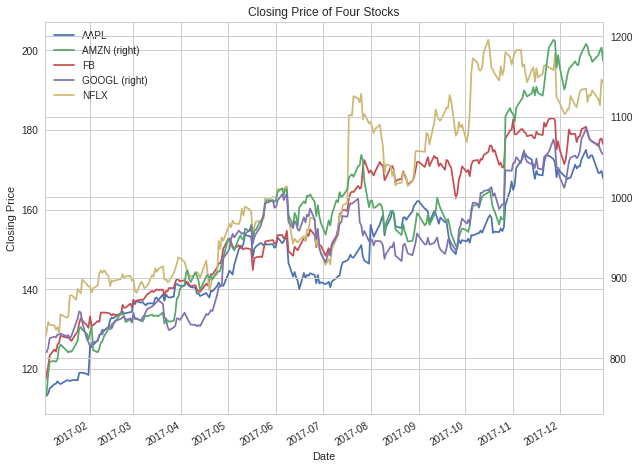

In [25]:
#visualizing closing price of all four stocks.
# closing price for Amazon and Google is on right y-axis and same is on left y-axis for Apple, Facebook, Netflix
ax = all_stocks_close.plot(secondary_y=["GOOGL", "AMZN"], grid=True, figsize=(10, 8), title="Closing Price of Four Stocks")
ax.set(xlabel='Date', ylabel='Closing Price')

## Volume Analysis of Traded Stocks

In [26]:
all_stock_volume = pd.DataFrame({"AAPL": df_apple17["volume"],
                      "GOOGL": df_goole17["volume"],
                      "FB": df_fb2017["volume"],
                      "NFLX": df_netflix2017["volume"],
                      "AMZN": df_amazon2017["volume"]})

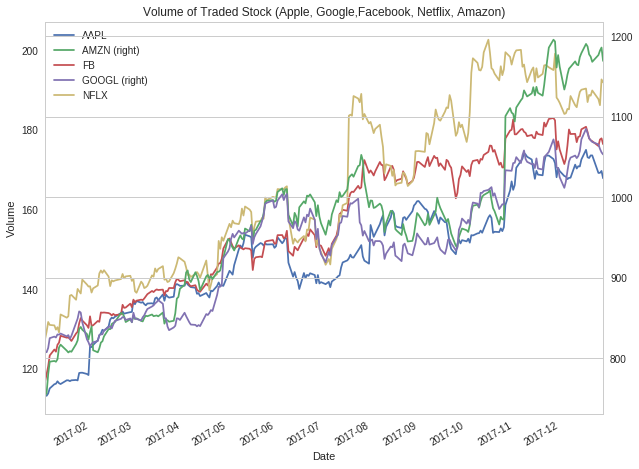

In [27]:
# plotting traded volume of all stocks
# Volumes of Amazon and Google are on right y-axis
ax = all_stocks_close.plot(secondary_y=['AMZN', 'GOOGL'],figsize=(10,8), legend=True,title="Volume of Traded Stock (Apple, Google,Facebook, Netflix, Amazon)")
ax.set(xlabel='Date', ylabel="Volume")

## Daily Return Analysis

In [28]:
# change in price of stock for each day
daily_return = all_stocks_close.pct_change()

In [29]:
# Replace NaN with 0
daily_return.fillna(0, inplace=True)

In [30]:
daily_return.head()

,AAPL,AMZN,FB,GOOGL,NFLX
date,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.001119,0.004657,0.015660,-0.000297,0.015060
2017-01-05,0.005085,0.030732,0.016682,0.006499,0.018546
2017-01-06,0.011148,0.019912,0.022707,0.014993,-0.005614
2017-01-09,0.009160,0.001168,0.012074,0.002387,-0.000916


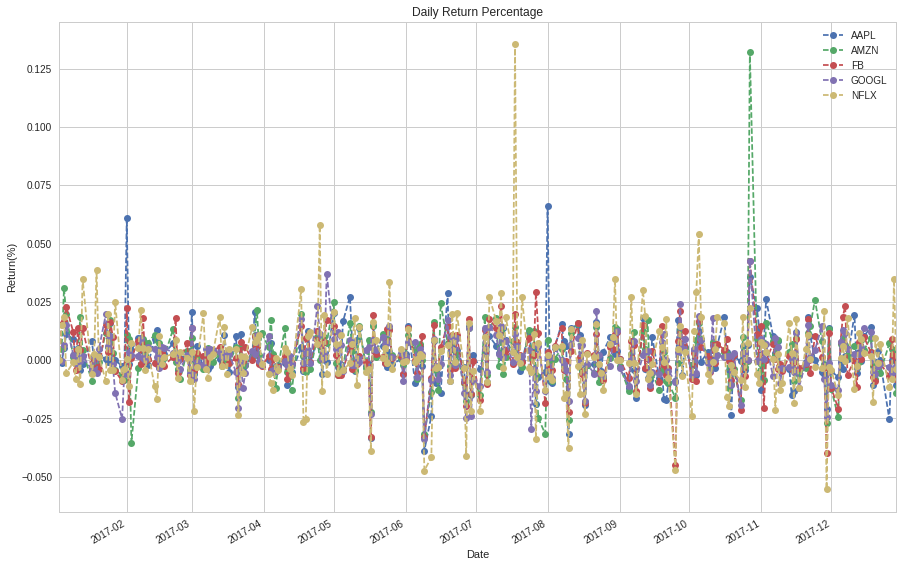

In [31]:
# Visualizing Daily return(%)
ax = daily_return.plot(figsize=(15,10), linestyle='--',marker='o', legend=True,title='Daily Return Percentage')
ax.set(xlabel='Date', ylabel='Return(%)')

From above graph, it seems that Amazon and Netflix gave almost highest(both almost equally) return in October-2017 and July-2017 respectively, while Amazon gives lowest return in November, 2017.

Which Stock gave highest daily return?

In [32]:
daily_return.max()

AAPL     0.066295
AMZN     0.132164
FB       0.042490
GOOGL    0.042616
NFLX     0.135436
dtype: float64

So, Netflix returned highest with 0.1354%

What is mean daily return of each stock?

In [33]:
daily_return.mean()

AAPL     0.001629
AMZN     0.001836
FB       0.001700
GOOGL    0.001103
NFLX     0.001782
dtype: float64

# Correlation Analysis

In [34]:
# Correlation analysis of Daily Return of stock
daily_return.corr(method='pearson')

,AAPL,AMZN,FB,GOOGL,NFLX
AAPL,1.000000,0.505748,0.538292,0.458261,0.342436
AMZN,0.505748,1.000000,0.654101,0.654544,0.397036
FB,0.538292,0.654101,1.000000,0.703432,0.507683
GOOGL,0.458261,0.654544,0.703432,1.000000,0.472235
NFLX,0.342436,0.397036,0.507683,0.472235,1.000000


From above correlation matrix, Google Stock's daily return is highly correlated with that of Facebook with pearson coeffiecient of 0.7034.

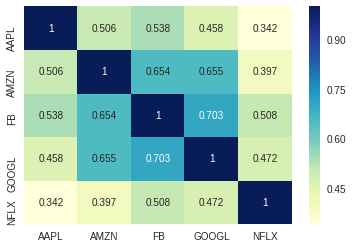

In [35]:
# Visualizing correlation matrix using heatmap to get correlation for daily returns of the stocks.
sns.heatmap(daily_return.corr(), annot=True, fmt='.3g',cmap='YlGnBu')

From visualization also, Google and Facebook has the strongest correlation of daily stock return, while the Google & Amazon has 2nd highest correlation of daily stock return. And Netflis & Apple is least correlated.

Here, higher the pearson coeffiecient, better the stocks are correlated.

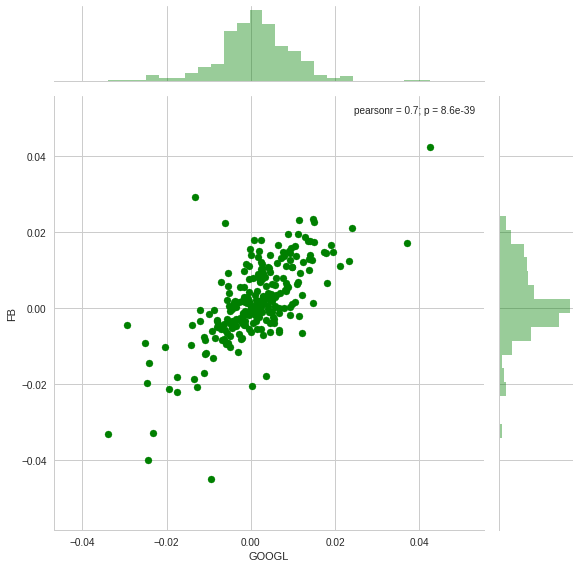

In [36]:
#compare the daily returns of Google and Facebook.

sns.jointplot('GOOGL','FB',daily_return, kind='scatter',size=8, color='green')

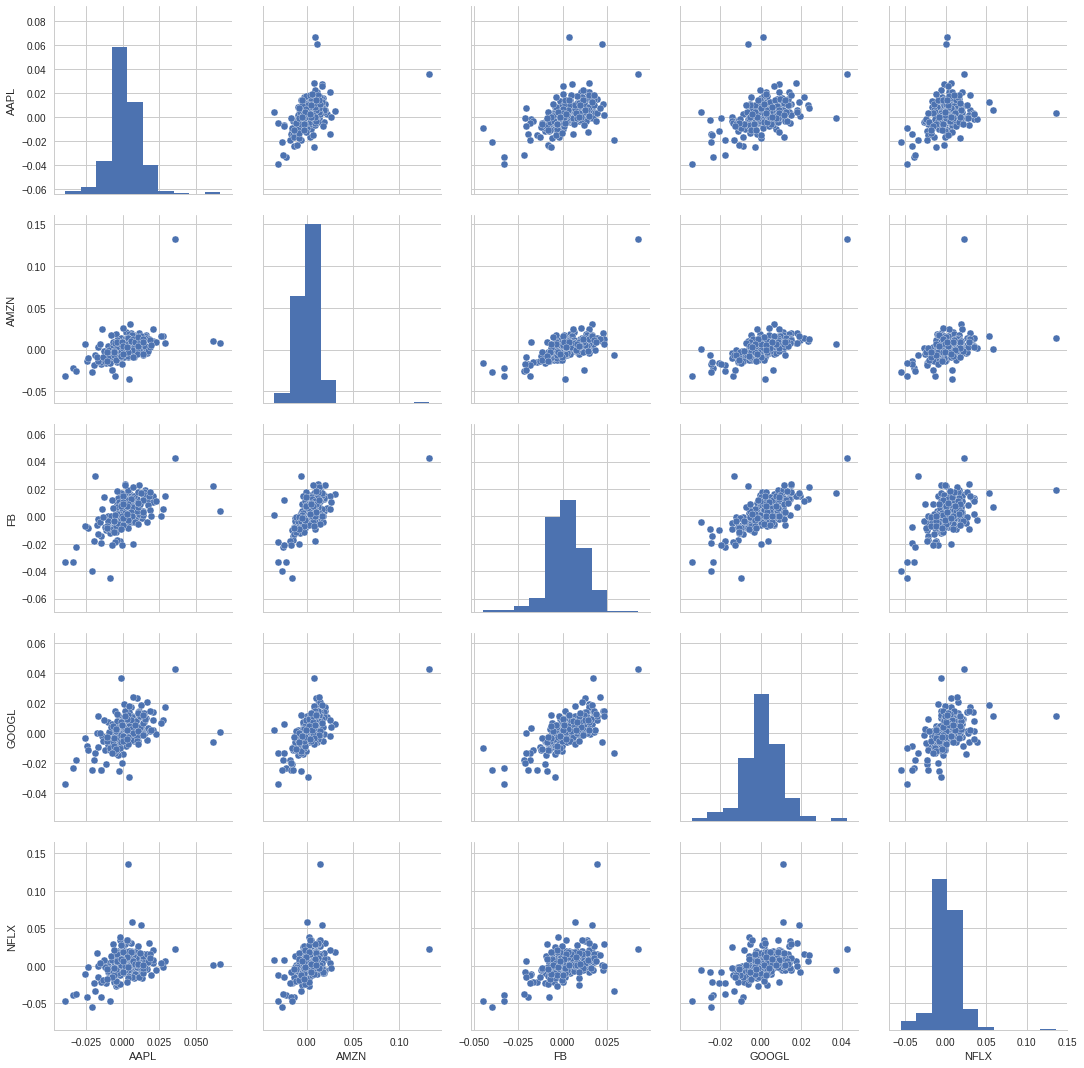

In [37]:
# Correlatoin Analysis of All Stock together

sns.pairplot(daily_return.dropna(), size=3, kind='scatter')

# Volatility Analysis

Volatility: measurement of the change in variance in the returns of a stock over a specific period of time.

- Higher the Volatility, the riskier the investment in that stock.

In [38]:
# minimum period for volatility analysis
min_day = 30 # Montly volatility

monthly_volatility = daily_return.rolling(window=min_day).std() * np.sqrt(min_day)

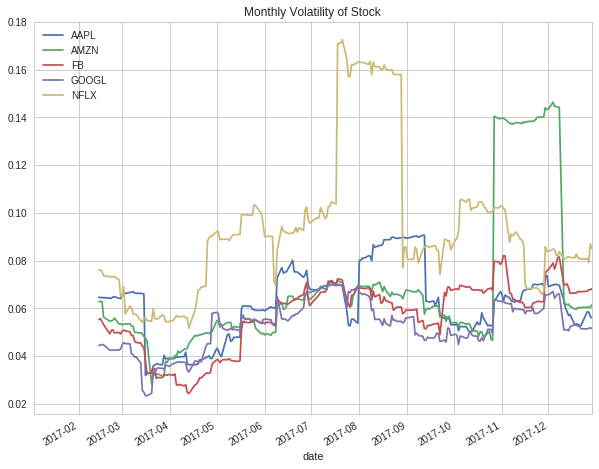

In [39]:
# Visualizing volatility
monthly_volatility.plot(figsize=(10,8),legend=True,title='Monthly Volatility of Stock')